In [ ]:
# Step 1: Import Libraries

# Pandas and NumPy for data manipulation
import pandas as pd
import numpy as np

# Seaborn and Matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# re and string for text preprocessing (like removing punctuation, special characters)
import re
import string

# NLTK for Natural Language Processing tasks
from nltk.corpus import stopwords                      # For removing common words like 'is', 'the', etc.
from nltk.stem import WordNetLemmatizer                # For reducing words to their base form (e.g., running → run)
from nltk.tokenize import word_tokenize                # For breaking text into individual words

# Train-test split from sklearn to divide dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Download required NLTK resources
import nltk
nltk.download('punkt', force=True)         # Tokenizer models
nltk.download('stopwords', force=True)     # Stopword list
nltk.download('wordnet', force=True)       # WordNet lemmatizer database
nltk.download('punkt_tab', force=True)     # Support files for tokenizer

# Optional download if required for additional corpora
# nltk.download('popular', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Step 2: Load Datasets

# Load fake and true news datasets from CSV files
fake_df = pd.read_csv('DataSet_Misinfo_FAKE.csv')
true_df = pd.read_csv('DataSet_Misinfo_TRUE.csv')

# Add a new column 'label' to each dataset to indicate the class
fake_df['label'] = 0  # 0 represents Fake News
true_df['label'] = 1  # 1 represents Real News

# Combine both datasets into a single DataFrame
df = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the combined DataFrame to mix fake and real news randomly
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Basic Exploration

# Display a summary of the dataset including data types and non-null counts
print(df.info())

# Display the count of fake and real news entries
print(df['label'].value_counts())

# Display the first 5 rows of the dataset to get a preview
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78617 entries, 0 to 78616
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  78617 non-null  int64 
 1   text        78588 non-null  object
 2   label       78617 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB
None
label
0    43642
1    34975
Name: count, dtype: int64


,Unnamed: 0,text,label
0,17273,Former Prime Minister Silvio Berlusconi said o...,1
1,43884,The EU makes use of migrant crisis to create o...,0
2,15660,Philippine security forces on Sunday arrested ...,1
3,29763,You are here: Home / US / 6 Brutal Truths Abou...,0
4,24361,Sometimes the Deep State isn’t so deep. For s...,1


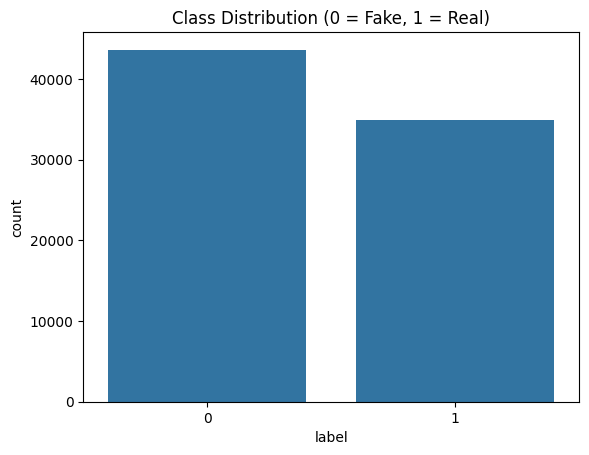

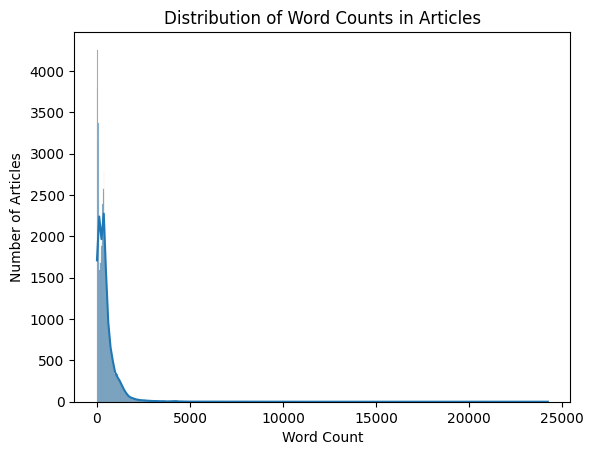

In [3]:
# Visualize Class Distribution

# Plot the number of fake (0) and real (1) news articles using a countplot
sns.countplot(x='label', data=df)
plt.title('Class Distribution (0 = Fake, 1 = Real)')  # Add a descriptive title
plt.show()  # Display the plot

# Step 4: EDA - Word Count

# Create a new column 'text_length' that contains the number of words in each article's text
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Plot the distribution of word counts in the articles
sns.histplot(df['text_length'], kde=True)  # kde=True adds a smooth curve to the histogram
plt.title("Distribution of Word Counts in Articles")
plt.xlabel("Word Count")  # X-axis label
plt.ylabel("Number of Articles")  # Y-axis label
plt.show()  # Display the plot


In [4]:
# Step 6: Preprocessing Functions

# Import necessary libraries for text cleaning and tokenization
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load English stopwords (commonly used words that carry little meaning, e.g., "the", "is")
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer (reduces words to their base or dictionary form)
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess the text
def clean_text(text):
    text = str(text).lower()                                       # Convert text to lowercase for uniformity
    text = re.sub(r'\[.*?\]', '', text)                            # Remove content inside square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)              # Remove URLs
    text = re.sub(r'<.*?>+', '', text)                             # Remove HTML tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)                                # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)                           # Remove words containing digits

    # Normalize smart quotes and apostrophes
    text = text.replace('“', '').replace('”', '').replace("’", "'").replace("‘", "'")

    # Remove possessive "'s" endings (e.g., "government's" → "government")
    text = re.sub(r"'s\b", '', text)

    # Tokenize the cleaned text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize remaining words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the cleaning function to the 'text' column and store results in a new column
df['clean_text'] = df['text'].apply(clean_text)


In [6]:
df.head()

,Unnamed: 0,text,label,text_length,clean_text
0,17273,Former Prime Minister Silvio Berlusconi said o...,1,236,former prime minister silvio berlusconi said t...
1,43884,The EU makes use of migrant crisis to create o...,0,41,make use migrant crisis create occupation army...
2,15660,Philippine security forces on Sunday arrested ...,1,341,philippine security force sunday arrested indo...
3,29763,You are here: Home / US / 6 Brutal Truths Abou...,0,568,home brutal truth democrat election revealed b...
4,24361,Sometimes the Deep State isn’t so deep. For s...,1,1484,sometimes deep state n't deep something suppos...


In [7]:
df = df.drop(columns = 'text_length')
df = df.drop(columns = 'text')

In [8]:
df = df[['clean_text', 'label']]

In [9]:
df.head()

,clean_text,label
0,former prime minister silvio berlusconi said t...,1
1,make use migrant crisis create occupation army...,0
2,philippine security force sunday arrested indo...,1
3,home brutal truth democrat election revealed b...,0
4,sometimes deep state n't deep something suppos...,1


In [10]:
# Step 7: Most Common Words

# Import Counter to count word frequencies
from collections import Counter

# Function to get the top N most common words from a list of cleaned texts
def get_top_cleaned_words(texts, n=20):
    # Combine all cleaned texts into one long string and split into individual words
    all_words = ' '.join(texts).split()
    # Count the frequency of each word and return the top N
    return Counter(all_words).most_common(n)

# Display the top 20 most common words in cleaned fake news
print("Top words in cleaned fake news:")
print(get_top_cleaned_words(df[df['label'] == 0]['clean_text'], n=20))

# Display the top 20 most common words in cleaned real news
print("\nTop words in cleaned real news:")
print(get_top_cleaned_words(df[df['label'] == 1]['clean_text'], n=20))


Top words in cleaned fake news:
[('trump', 99901), ('people', 49078), ('said', 47010), ('one', 45548), ('clinton', 45279), ('would', 43862), ('state', 42911), ('president', 37319), ('time', 33825), ('like', 31860), ('hillary', 30578), ('american', 30031), ('year', 29051), ('also', 28653), ('new', 28404), ('obama', 27033), ('even', 25564), ('say', 24616), ('donald', 24276), ('election', 22597)]

Top words in cleaned real news:
[('said', 166773), ('trump', 95984), ('state', 62588), ('would', 57231), ('president', 46783), ('year', 41717), ('one', 40069), ('people', 38344), ('new', 37947), ('republican', 35453), ('also', 33092), ('time', 29538), ("n't", 29042), ('government', 27876), ('could', 27751), ('house', 26893), ('clinton', 26669), ('united', 24973), ('country', 24527), ('two', 24323)]


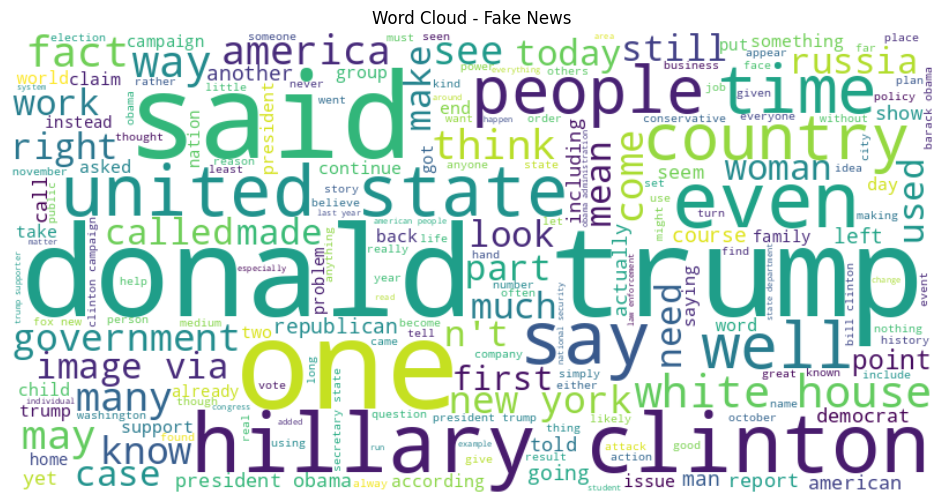

In [5]:
# Step 8: Word Cloud
# Install wordcloud package if not already installed
# !pip install wordcloud

# Import WordCloud for generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for cleaned fake news text
# Join all the cleaned fake news articles into one string
fake_words = ' '.join(df[df['label'] == 0]['clean_text'])

# Create a WordCloud object with specified dimensions and white background
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)

# Plot the generated word cloud
plt.figure(figsize=(12, 6))  # Set the size of the figure
plt.imshow(wordcloud_fake, interpolation='bilinear')  # Display the word cloud image
plt.axis('off')  # Hide axis lines and labels
plt.title("Word Cloud - Fake News")  # Add title to the plot
plt.show()  # Display the plot


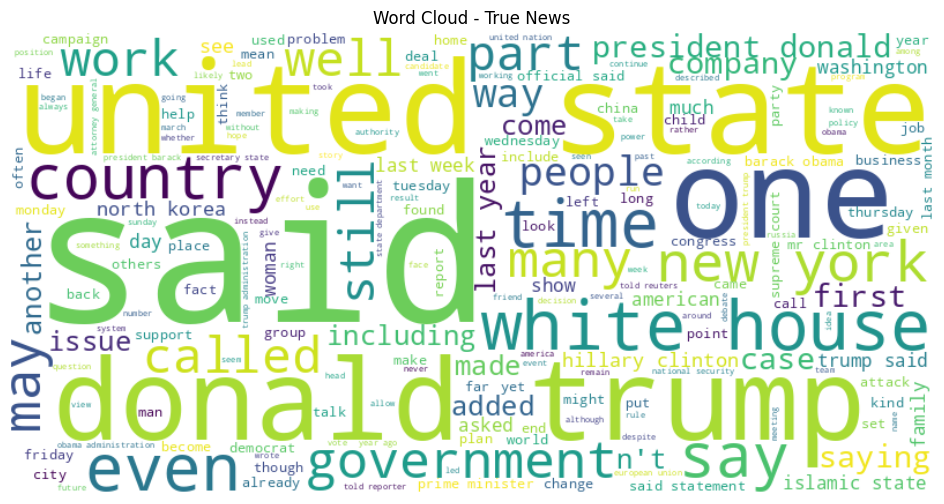

In [11]:
# Word Cloud for cleaned True (Real) News

# Combine all cleaned real news articles into a single string
true_words = ' '.join(df[df['label'] == 1]['clean_text'])

# Create a WordCloud object using the real news text
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_words)

# Plot the word cloud for real news
plt.figure(figsize=(12, 6))  # Set the size of the plot
plt.imshow(wordcloud_true, interpolation='bilinear')  # Render the word cloud image
plt.axis('off')  # Hide axis ticks and labels
plt.title("Word Cloud - True News")  # Add title to the plot
plt.show()  # Display the plot


In [12]:
# Step 9: Split into Train / Validation / Test Sets

# Define features (X) and labels (y)
X = df['clean_text']  # Input: cleaned news articles
y = df['label']       # Output: 0 for fake, 1 for real

# First split: 70% training, 30% temporary set (for validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,         # 30% goes to temp (to be split into val and test)
    stratify=y,            # Maintain the same class distribution as original dataset
    random_state=42        # Ensures reproducibility
)

# Second split: 15% validation, 15% testing (each half of X_temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,         # 50% of temp = 15% of total data
    stratify=y_temp,       # Maintain class distribution
    random_state=42
)

# Display the number of samples in each split
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

Training samples: 55031
Validation samples: 11793
Test samples: 11793


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectors

# Initialize the TF-IDF Vectorizer
# max_features=10000 means we keep the top 10,000 most important words based on TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer on the training data and transform it into TF-IDF vectors
X_train_vec = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation and test sets using the same vectorizer (no refitting)
X_val_vec = tfidf_vectorizer.transform(X_val)
X_test_vec = tfidf_vectorizer.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Define a reusable function to train a model and evaluate it on the validation set
def train_and_evaluate(model, name):
    model.fit(X_train_vec, y_train)  # Train the model using training vectors and labels
    y_pred = model.predict(X_val_vec)  # Predict on the validation set
    print(f"\nModel: {name}")  # Print model name
    # Print precision, recall, f1-score for each class (Fake, Real)
    print(classification_report(y_val, y_pred, target_names=['Fake', 'Real']))

# Logistic Regression
train_and_evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")

# Multinomial Naive Bayes
train_and_evaluate(MultinomialNB(), "Naive Bayes")

# Support Vector Machine (Linear SVM)
train_and_evaluate(LinearSVC(), "Support Vector Machine")



Model: Logistic Regression
              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94      6546
        Real       0.93      0.91      0.92      5247

    accuracy                           0.93     11793
   macro avg       0.93      0.93      0.93     11793
weighted avg       0.93      0.93      0.93     11793


Model: Naive Bayes
              precision    recall  f1-score   support

        Fake       0.86      0.89      0.87      6546
        Real       0.86      0.81      0.83      5247

    accuracy                           0.86     11793
   macro avg       0.86      0.85      0.85     11793
weighted avg       0.86      0.86      0.85     11793


Model: Support Vector Machine
              precision    recall  f1-score   support

        Fake       0.95      0.95      0.95      6546
        Real       0.94      0.93      0.94      5247

    accuracy                           0.94     11793
   macro avg       0.94      0.94      0.94     1

In [15]:
# Step 10: Predicting on a new news article

# Define a function to preprocess and predict the label of a new article
def predict_article(article_text, model, model_name):
    # Preprocess the input text using the same cleaning function used during training
    cleaned_article = clean_text(article_text)

    # Convert the cleaned text into a TF-IDF vector using the fitted vectorizer
    vec_article = tfidf_vectorizer.transform([cleaned_article])

    # Predict the label using the given model (0 for Fake, 1 for Real)
    prediction = model.predict(vec_article)[0]

    # Convert numeric label to readable class name
    label = "Real" if prediction == 1 else "Fake"

    # Display the model name and its prediction
    print(f"\n{model_name} Prediction for the article: {label}")

    return label

# Example new article to test the models
new_article = """
Former US President Barack Obama praised the resilience of American democracy in a recent speech.
He emphasized the importance of civic engagement and voting rights.
"""

# Re-train models using the training set (if not already trained)
# You can skip this step if the models are already trained above

logreg_model = LogisticRegression(max_iter=1000)
logreg_model = logreg_model.fit(X_train_vec, y_train)

nb_model = MultinomialNB()
nb_model = nb_model.fit(X_train_vec, y_train)

svm_model = LinearSVC()
svm_model = svm_model.fit(X_train_vec, y_train)

# Predict the label of the new article using each model
predict_article(new_article, logreg_model, "Logistic Regression")
predict_article(new_article, nb_model, "Naive Bayes")
predict_article(new_article, svm_model, "Support Vector Machine")



Logistic Regression Prediction for the article: Fake

Naive Bayes Prediction for the article: Real

Support Vector Machine Prediction for the article: Fake


'Fake'

In [16]:
print(df['label'].value_counts())  # Ideally close to 50-50


label
0    43642
1    34975
Name: count, dtype: int64


In [ ]:
!pip install tensorflow


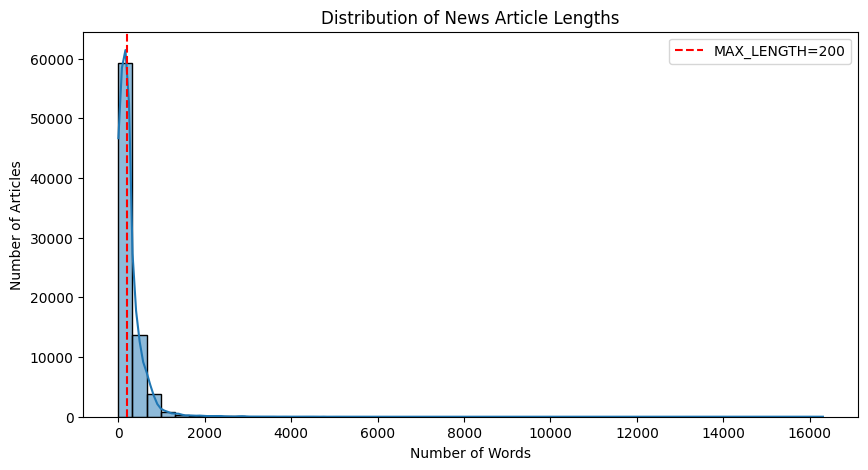

In [18]:
# Count number of words per article in the cleaned text
df['clean_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Import plotting libraries (optional here if already imported above)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of article lengths (in words)
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df['clean_length'], bins=50, kde=True)  # Histogram with 50 bins and KDE curve

# Add a red dashed vertical line at 200 words to represent a common max length threshold
plt.axvline(200, color='red', linestyle='--', label='MAX_LENGTH=200')

# Add title and axis labels
plt.title('Distribution of News Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')

# Add legend to explain the red line
plt.legend()

# Display the plot
plt.show()


In [19]:
import numpy as np

# Calculate the number of words in each cleaned article
lengths = df['clean_text'].apply(lambda x: len(x.split()))

# Print the 90th and 95th percentile values to understand article length distribution
# This helps in choosing an appropriate max length for padding/truncation (in deep learning models)
print("90% of articles are shorter than:", np.percentile(lengths, 90))
print("95% of articles are shorter than:", np.percentile(lengths, 95))

90% of articles are shorter than: 564.0
95% of articles are shorter than: 736.0


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set vocabulary size and maximum sequence length
MAX_VOCAB = 20000     # Only the top 20,000 most frequent words will be kept
MAX_LENGTH = 300      # All sequences will be padded or truncated to 300 tokens

# Initialize a Keras tokenizer with an Out-Of-Vocabulary token
tokenizer_glove = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")

# Fit the tokenizer on training data (builds the word index based on frequency)
tokenizer_glove.fit_on_texts(X_train)

# Convert text data to sequences of integers (word indices)
X_train_seq = tokenizer_glove.texts_to_sequences(X_train)
X_val_seq = tokenizer_glove.texts_to_sequences(X_val)
X_test_seq = tokenizer_glove.texts_to_sequences(X_test)

# Pad or truncate the sequences to ensure uniform input length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')


In [21]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip


--2025-06-30 16:04:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-30 16:04:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-30 16:04:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [22]:
# Load GloVe word embeddings into a dictionary
embedding_index = {}
with open('glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()  # Each line: word followed by 300 float values
        word = values[0]  # First item is the word
        vector = np.asarray(values[1:], dtype='float32')  # Convert remaining to numpy float array
        embedding_index[word] = vector  # Store in dictionary

# Set dimensions and vocab size
EMBEDDING_DIM = 300  # GloVe file used has 300-dimensional vectors
VOCAB_SIZE = min(MAX_VOCAB, len(tokenizer_glove.word_index) + 1)  # Cap vocab size at MAX_VOCAB

# Initialize embedding matrix with zeros (shape: VOCAB_SIZE × EMBEDDING_DIM)
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

# Populate embedding matrix with GloVe vectors
for word, i in tokenizer_glove.word_index.items():
    if i >= VOCAB_SIZE:
        continue  # Skip words outside the capped vocabulary
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign pre-trained vector to corresponding index


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Build a Sequential neural network model using pre-trained GloVe embeddings
model_glove = Sequential([
    # Embedding layer initialized with GloVe embeddings
    Embedding(
        input_dim=VOCAB_SIZE,        # Vocabulary size
        output_dim=EMBEDDING_DIM,    # Embedding dimensions (should match GloVe vector size)
        weights=[embedding_matrix],  # Use the pre-trained embedding matrix
        input_length=MAX_LENGTH,     # Input sequence length (padded length)
        trainable=False              # Keep embeddings fixed (not trainable)
    ),

    # Global average pooling over time (averages the embeddings of all tokens in a sequence)
    GlobalAveragePooling1D(),

    # First hidden layer with ReLU activation
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout for regularization

    # Second hidden layer with ReLU activation
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout for regularization

    # Output layer with sigmoid activation for binary classification (Fake or Real)
    Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric
model_glove.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model using training data and validate on the validation set
history = model_glove.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=128  # Number of samples per gradient update
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7827 - loss: 0.4901 - val_accuracy: 0.8674 - val_loss: 0.3157
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3122 - val_accuracy: 0.8761 - val_loss: 0.2899
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8857 - loss: 0.2826 - val_accuracy: 0.8836 - val_loss: 0.2801
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8876 - loss: 0.2732 - val_accuracy: 0.8863 - val_loss: 0.2697
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8966 - loss: 0.2552 - val_accuracy: 0.8898 - val_loss: 0.2623
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8994 - loss: 0.2507 - val_accuracy: 0.8944 - val_loss: 0.2567
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9043 - loss: 0.2397 - val_accuracy: 0.8949 - val_loss: 0.2525
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9037 - loss: 0.2403 - val_accuracy: 0

In [24]:
test_loss, test_acc = model_glove.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 0.2378
Test Accuracy: 0.9055


In [25]:
# Define a function to predict whether a given news article is fake or real
def predict_news_article(text):
    # Step 1: Clean the input text using the same preprocessing as training
    cleaned = clean_text(text)

    # Step 2: Convert cleaned text to a sequence of word indices using the tokenizer
    seq = tokenizer_glove.texts_to_sequences([cleaned])

    # Step 3: Handle edge case where input has no recognizable tokens
    if len(seq[0]) == 0:
        print("Warning: input text too short or empty after cleaning.")
        return "Cannot predict: input too short or no valid tokens."

    # Step 4: Pad the sequence to the same MAX_LENGTH used during training
    padded = pad_sequences(seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

    # Step 5: Predict using the trained deep learning model
    pred = model_glove.predict(padded)[0][0]

    # Step 6: Print raw prediction probability and return human-readable label
    print(f"Raw prediction probability: {pred:.4f}")
    return "Real News" if pred >= 0.5 else "Fake News"

# Example: Try with a sample input text
new_text = (
    "Apple released the iPhone 7 in September 2016 without a headphone jack—a bold move "
    "that sparked controversy and user frustration. The device still logged record-breaking sales."
)
print(predict_news_article(new_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Raw prediction probability: 0.1376
Fake News


In [26]:
new_article = "In 2017, Uber admitted to hiding a 2016 breach exposing 57 million users/drivers, paying hackers to stay silent—sparked outrage and raised questions about corporate transparency. Though real, the cover-up itself was news that unveiled the breach."
# Predict using all three models
predict_article(new_article, logreg_model, "Logistic Regression")
predict_article(new_article, nb_model, "Naive Bayes")
predict_article(new_article, svm_model, "Support Vector Machine")



Logistic Regression Prediction for the article: Fake

Naive Bayes Prediction for the article: Fake

Support Vector Machine Prediction for the article: Fake


'Fake'

In [27]:
# STEP: Install BERT requirements (only needed once)
# Installs Hugging Face Transformers library
!pip install -q transformers

# STEP: Import Required Libraries
import torch
from transformers import BertTokenizer, BertModel
from tqdm.notebook import tqdm  # For progress bar while encoding
import numpy as np

# STEP: Load Pretrained BERT Model

# Load the tokenizer for 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the pretrained BERT model
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Use GPU if available, else fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to selected device (GPU/CPU) and set to evaluation mode
bert_model = bert_model.to(device)
bert_model.eval()

# STEP: Define function to convert clean text to BERT embeddings
def get_bert_embeddings(text_list):
    embeddings = []  # Store final CLS embeddings
    with torch.no_grad():  # Disable gradient calculation for inference (saves memory/speed)
        for text in tqdm(text_list, desc="Encoding with BERT"):
            # Tokenize the input text (truncate/pad to max length 300)
            inputs = tokenizer(
                text,
                return_tensors='pt',  # Return PyTorch tensors
                truncation=True,
                padding=True,
                max_length=300
            )

            # Move tokenized inputs to device
            inputs = {k: v.to(device) for k, v in inputs.items()}

            # Get the output from BERT model
            outputs = bert_model(**inputs)

            # Extract the [CLS] token's embedding (represents the full sentence)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()

            # Append to the list of embeddings
            embeddings.append(cls_embedding)

    # Return all CLS embeddings as a NumPy array
    return np.array(embeddings)

# STEP: Encode the cleaned text splits using BERT
X_train_embed = get_bert_embeddings(X_train.tolist())
X_val_embed   = get_bert_embeddings(X_val.tolist())
X_test_embed  = get_bert_embeddings(X_test.tolist())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Encoding with BERT:   0%|          | 0/55031 [00:00<?, ?it/s]

Encoding with BERT:   0%|          | 0/11793 [00:00<?, ?it/s]

Encoding with BERT:   0%|          | 0/11793 [00:00<?, ?it/s]

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple feedforward neural network for classification using BERT embeddings
model_bert = Sequential([
    # First dense (fully connected) layer with ReLU activation
    Dense(128, activation='relu', input_shape=(768,)),  # 768 = BERT [CLS] embedding size
    Dropout(0.3),  # Dropout layer to prevent overfitting

    # Second dense layer
    Dense(64, activation='relu'),
    Dropout(0.3),  # Another dropout layer for regularization

    # Output layer with sigmoid activation for binary classification (Fake vs Real)
    Dense(1, activation='sigmoid')
])

# Compile the model
model_bert.compile(
    optimizer='adam',                # Adaptive optimizer
    loss='binary_crossentropy',     # Suitable for binary classification
    metrics=['accuracy']            # Track accuracy during training/validation
)

# Train the model on BERT embeddings
model_bert.fit(
    X_train_embed, y_train,                          # Training data
    validation_data=(X_val_embed, y_val),            # Validation data
    epochs=10,                                       # Number of epochs
    batch_size=64                                    # Number of samples per batch
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8065 - loss: 0.4121 - val_accuracy: 0.8914 - val_loss: 0.2629
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8902 - loss: 0.2663 - val_accuracy: 0.9010 - val_loss: 0.2419
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8974 - loss: 0.2500 - val_accuracy: 0.9078 - val_loss: 0.2256
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9044 - loss: 0.2365 - val_accuracy: 0.9037 - val_loss: 0.2305
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9111 - loss: 0.2194 - val_accuracy: 0.9113 - val_loss: 0.2226
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9091 - loss: 0.2166 - val_accuracy: 0.9149 - val_loss: 0.2104
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9143 - loss: 0.2130 - val_accuracy: 0.9157 - val_loss: 0.2104
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2102 - val_accuracy: 0

In [29]:
# Evaluate the BERT-based model on the test set
loss, acc = model_bert.evaluate(X_test_embed, y_test)
print(f"Test Accuracy with BERT embeddings: {acc:.4f}")  # Print accuracy rounded to 4 decimal places

# Define a function to predict whether a new article is fake or real using BERT + trained classifier
def predict_news_article_bert(text):
    # Step 1: Clean the input text
    cleaned = clean_text(text)

    # Step 2: Tokenize and encode the text using the BERT tokenizer
    inputs = tokenizer(cleaned, return_tensors='pt', truncation=True, padding=True, max_length=300)
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move inputs to the same device as BERT

    # Step 3: Get the [CLS] token embedding from BERT
    with torch.no_grad():
        outputs = bert_model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy().reshape(1, -1)

    # Step 4: Use the trained MLP model to predict on the BERT embedding
    pred = model_bert.predict(cls_embedding)[0][0]

    # Step 5: Print the raw probability and return a readable label
    print(f"Raw prediction probability: {pred:.4f}")
    return "Real News" if pred >= 0.5 else "Fake News"

# Example usage:
# new_article = "..."  # Replace with actual news text
# print(predict_news_article_bert(new_article))

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - loss: 0.2054
Test Accuracy with BERT embeddings: 0.9196


In [30]:
text = "In 2017, Uber admitted to hiding a 2016 breach exposing 57 million users/drivers, paying hackers to stay silent—sparked outrage and raised questions about corporate transparency. Though real, the cover-up itself was news that unveiled the breach."
print(predict_news_article_bert(text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Raw prediction probability: 0.2927
Fake News


In [31]:
# Ensemble Model

import numpy as np

# Ensure that all the required models and preprocessing tools are already defined and trained:
# - logreg_model (Logistic Regression)
# - nb_model (Naive Bayes)
# - model_glove (Deep Learning model using GloVe)
# - tfidf_vectorizer (for classical models)
# - tokenizer_glove (for GloVe input)
# - clean_text(), pad_sequences, etc. (for preprocessing)

# Function to make ensemble predictions
def predict_ensemble(text):
    # Step 1: Preprocess the input text
    cleaned = clean_text(text)

    # Step 2: Transform using TF-IDF for classical models
    vec = tfidf_vectorizer.transform([cleaned])

    # Step 3: Tokenize and pad for the GloVe model
    seq = tokenizer_glove.texts_to_sequences([cleaned])
    if len(seq[0]) == 0:
        print("Warning: input text too short or empty after cleaning.")
        return "Cannot predict: input too short or no valid tokens."
    padded = pad_sequences(seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

    # Step 4: Predict class probabilities
    prob_nb = nb_model.predict_proba(vec)[0][1]           # Probability of "Real" by Naive Bayes
    prob_logreg = logreg_model.predict_proba(vec)[0][1]   # Probability of "Real" by Logistic Regression
    prob_glove = model_glove.predict(padded)[0][0]        # Probability of "Real" by GloVe model

    # Step 5: Compute weighted ensemble score
    ensemble_score = (0.40 * prob_nb) + (0.15 * prob_logreg) + (0.45 * prob_glove)

    # Step 6: Print individual and ensemble scores
    print(f"Naive Bayes: {prob_nb:.4f}, Logistic Regression: {prob_logreg:.4f}, GloVe: {prob_glove:.4f}")
    print(f"Ensemble Score: {ensemble_score:.4f}")

    # Step 7: Final prediction based on ensemble score threshold (0.5)
    return "Real News ✅" if ensemble_score >= 0.5 else "Fake News ❌"

# Example usage
example_article = """
In 2017, President Trump’s travel ban targeting several Muslim-majority countries sparked nationwide protests and legal battles—critics called it discriminatory, while the administration defended it as a national security measure.
"""

# Run the ensemble prediction
print(predict_ensemble(example_article))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Naive Bayes: 0.8757, Logistic Regression: 0.5484, GloVe: 0.9895
Ensemble Score: 0.8778
Real News ✅


In [32]:
import pickle

# Save trained Logistic Regression model to a file
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

# Save trained Naive Bayes model
with open("nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

# Save fitted TF-IDF vectorizer used with classical models
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

# Save tokenizer used for GloVe-based deep learning model
with open("glove_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer_glove, f)

# Save trained Keras model (GloVe-based MLP) to HDF5 format
model_glove.save("glove_model.h5")
